# Homework 1
Due Date - Wednesday 28th January (11:59 PM)

In [1]:
# Imports
import numpy as np  # arrays, vectorized math
import pandas as pd  # tabular data handling (not heavily used here but students should familiarize themselves with this)
import matplotlib.pyplot as plt  # plotting
from sklearn.linear_model import LinearRegression  # ready-made linear regression

rng = np.random.default_rng(42)  # reproducible randomness

## Synthetic Data
We will create noisy linear data so we know the true relationship.

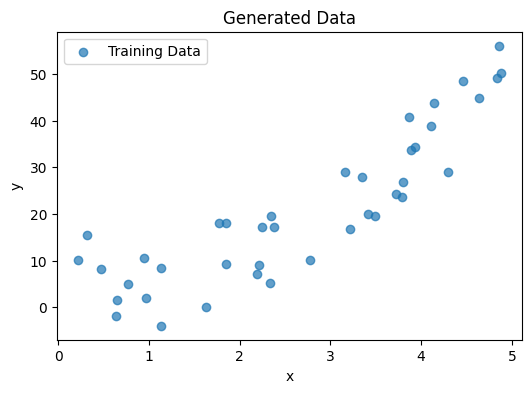

In [2]:
# Do not chnage this cell 

# Generate toy data
# Set number of points to generate 
n = 40

# Generate x axis data in the range of 0 to 5 
# This is generated using a uniform distribution from numpy 
x = rng.uniform(0, 5, size = n)

# Generate noise in the same shape from a Gaussian (normal) distribution
noise = rng.normal(0, 2.0, size=n)
uniform_noise = rng.uniform(-10, 10, size=n)

# Define the "true" distribution
y = 3 + (2 * (x ** 2)) + noise + uniform_noise

# Some code to plot everything 
fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(x, y, alpha=0.7, label="Training Data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.set_title("Generated Data")
plt.show()

## Matrix (Normal Equation) View
Stack inputs into a matrix $X$ with a bias column of ones. The closed-form solution is
$$\theta = (X^\top X)^{-1} X^\top y,$$
where $\theta = [\theta_0, \theta_1, \cdots \theta_n]^\top$. This is the same solution we derived in scalars, just written compactly.

## Question 1 (10 points)

Matrix slope (theta_1): 9.694
Matrix intercept (theta_0): -4.780


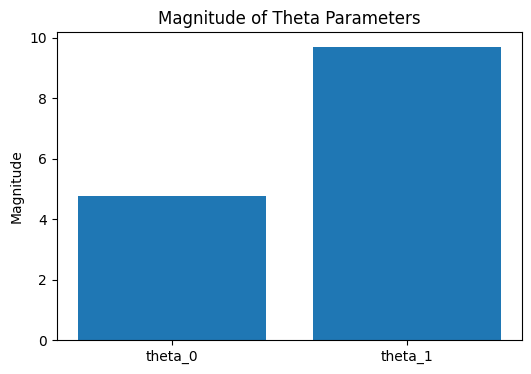

In [3]:
###############################################
############### Question 1 ####################
###############################################

# TODO: Solve for theta using the normal equation method equation shown above
# Remember, you will need to account for the intercept / bias term. Use the np.column_stack 
# or the np.hstack() function to add a columns to your matrix X.
# You can then use np.linalg.inv to compute the inverse
# use the "@" operator to compute matrix multiplications

################################################
########## Write your answer here ##############
################################################

X = np.column_stack([np.ones_like(x), x])
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta_0, theta_1 = theta


################################################
########## End of your answer ##################
################################################

print(f"Matrix slope (theta_1): {theta_1:.3f}")
print(f"Matrix intercept (theta_0): {theta_0:.3f}")

# Plot the magnitudes of theta
fig, ax = plt.subplots(figsize = (6, 4))
# Note that we use np.abs since we care only about the magnitude here and not the sign
ax.bar(['theta_0', 'theta_1'], np.abs([theta_0, theta_1]))
ax.set_ylabel('Magnitude')
ax.set_title('Magnitude of Theta Parameters')
plt.show()


## Question 2 (5 points) 

Manual MSE: 59.378


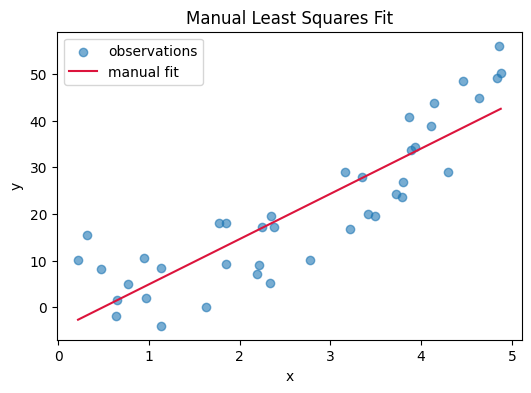

In [4]:
###############################################
############### Question 2 ####################
###############################################

#TODO: Using your theta_0 and theta_1 from above, compute the predicted y values (y_hat). 
# You can compute the predicted values using the linear regression equation and the theta values you found above.

################################################
########## Write your answer here ##############    
################################################

# Predict and evaluate
# Define the learned model in terms of theta_0 and theta_1
y_hat = X @ theta  # Replace with your answer

################################################
########## End of your answer ##################
################################################


# Compute and print loss 
mse_manual = np.mean((y - y_hat) ** 2)
print(f"Manual MSE: {mse_manual:.3f}")

# Plot results
fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(x, y, alpha=0.6, label="observations")
ax.plot(np.sort(x), y_hat[np.argsort(x)], color="crimson", label="manual fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Manual Least Squares Fit")
ax.legend()
plt.show()

## Question 3 (10 points)
Lets make this a more complex model

In [5]:
# Remember you have a matrix X - lets look at its shape
print (X.shape)

(40, 2)


Number of parameters:  11
New theta values: [-2.06897471e+01  3.45916698e+02 -1.23809541e+03  2.05618538e+03
 -1.92172569e+03  1.10685348e+03 -4.08098450e+02  9.65811404e+01
 -1.41831388e+01  1.17546240e+00 -4.19798910e-02]


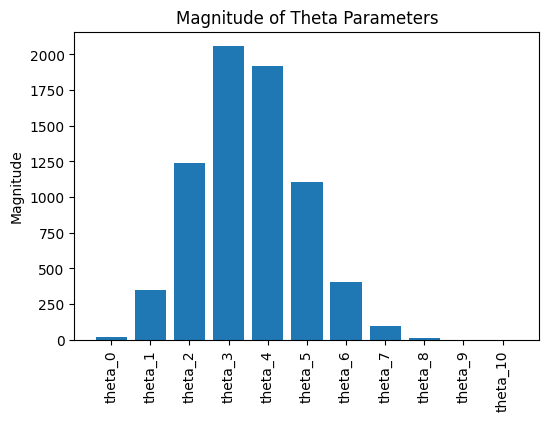

In [6]:
# Okay, now, lets add a few more features to X to see how that affects our model

###############################################
############### Question 2 ####################
###############################################

# TODO: Write a function to add x^2, x^3, all the way to x^10 as additional columns to X using np.column_stack or np.hstack
# Then compute theta again.

################################################
########## Write your answer here ##############    
################################################

def add_polynomial_features(x, degree):

    '''
    x : vector of shape (n,) representing the input feature. This is a np.array object
    degree : integer representing the maximum polynomial degree to add as features
    '''

    X = np.column_stack([np.ones_like(x), x])
    for d in range(2, degree + 1):
        X = np.column_stack([X, x ** d])
    return X

X = add_polynomial_features(x, 10)

# Now let us rerun the linear regression using your code above to find theta. 
theta = np.linalg.inv(X.T @ X) @ X.T @ y

################################################
########## End of your answer ##################
################################################

print ("Number of parameters: ", len(theta))
print (f"New theta values: {theta}")

# Plot the magnitudes of theta
plt.figure(figsize = (6, 4))
plt.bar(['theta_' + str(i) for i in range(len(theta))], np.abs(theta))
plt.xticks(rotation = 90)
plt.ylabel('Magnitude')
plt.title('Magnitude of Theta Parameters')
plt.show()

Manual MSE: 29.712


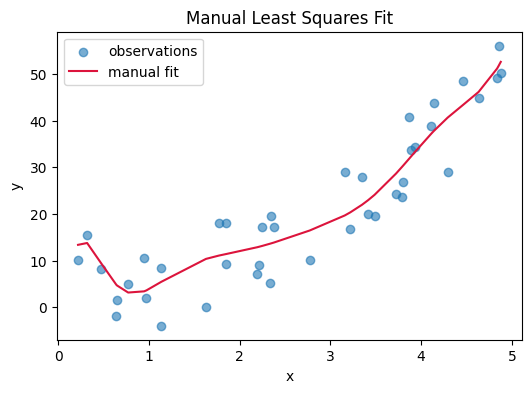

In [7]:
# Now let's predict again using the new theta values. You can use the answer from Question 2 here. 
# Hint: Since you have multiple theta values now, try using the matrix form instead of the scalar form.

################################################
########## Write your answer here ##############    
################################################

y_hat = X @ theta

################################################
########## End of your answer ##################
################################################

# Compute and print loss 
mse_manual = np.mean((y - y_hat) ** 2)
print(f"Manual MSE: {mse_manual:.3f}")

# Plot results
fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(x, y, alpha=0.6, label="observations")
ax.plot(np.sort(x), y_hat[np.argsort(x)], color="crimson", label="manual fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Manual Least Squares Fit")
ax.legend()
plt.show()

## Question 4 (5 points)
Scroll up and check the MSE value you obtained in Question 2 with only linear features (x^1) and check the MSE model you obtained in Question 3 with polynomial features (x^1 to x^10). Which model do you think is better? Why? Look at the shape of the curves learned? Which model is better? 


**Answer:** The second model has lower MSE so technically it looks better. However, the learned curve looks like it is overfitting the data points. 

## Question 5 (10 points)
We're going to see the impact of regularization in this question. 

Remember, regularization modifies the loss equation as 

$L(\theta) = \frac{1}{m} \sum(Y - X\theta)^2 + \lambda \|\theta\|^2$

and the optimal $\theta$ can be found using

$\theta = (X^\top X + \lambda I)^{-1} X^\top y$

Here, $\lambda$ is a real scalar value and is the regularization hyper-parameter that controls how much you care about reducing the magnitudes of $\theta$ and $I$ is the identity matrix. The term $\lambda \cdot I$ is *not* matrix multiplication. Why? Because $\lambda$ is a scalar value and $I$ is the only matrix. So the resultant matrix will look like 
$
\lambda * \begin{bmatrix}
1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 \\
 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1
\end{bmatrix}
= \begin{bmatrix}
\lambda & 0 & 0 & 0 \\
 0 & \lambda & 0 & 0 \\
 0 & 0 & \lambda & 0 \\
 0 & 0 & 0 & \lambda
\end{bmatrix}
$

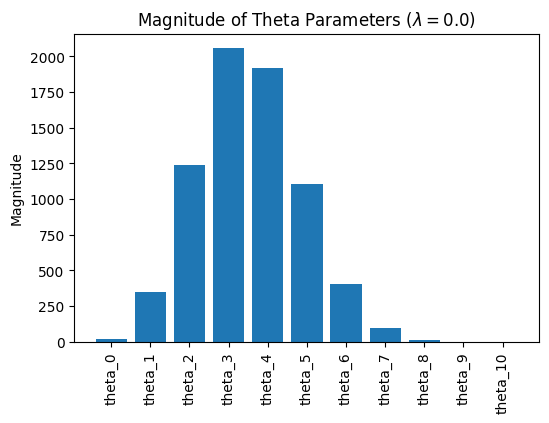

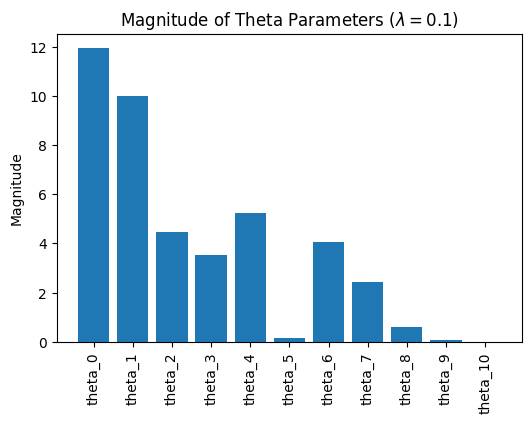

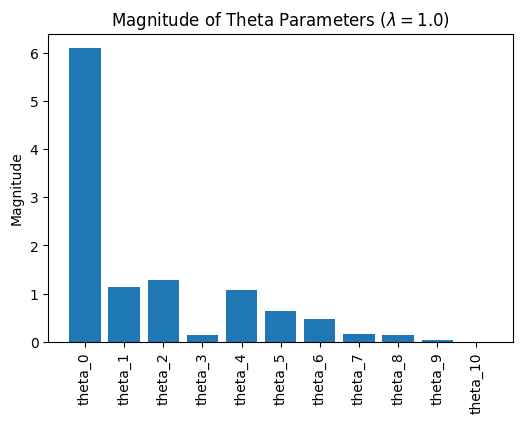

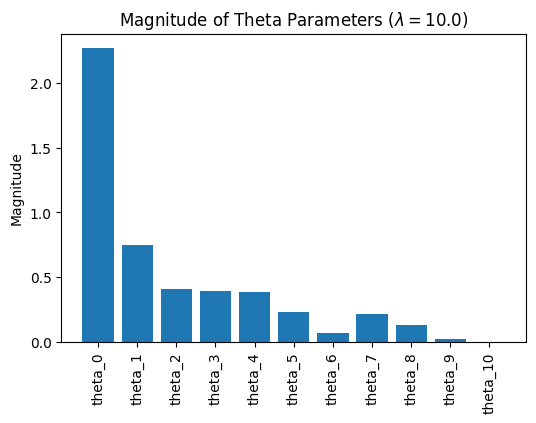

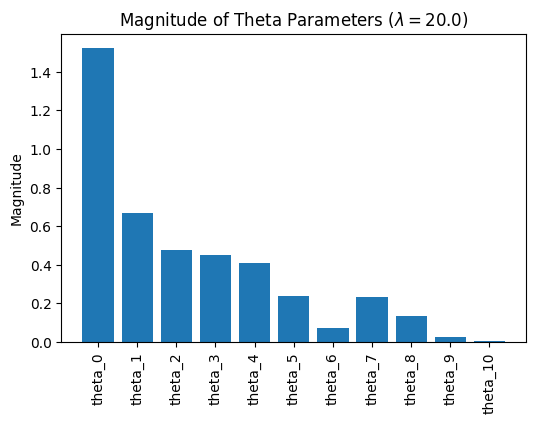

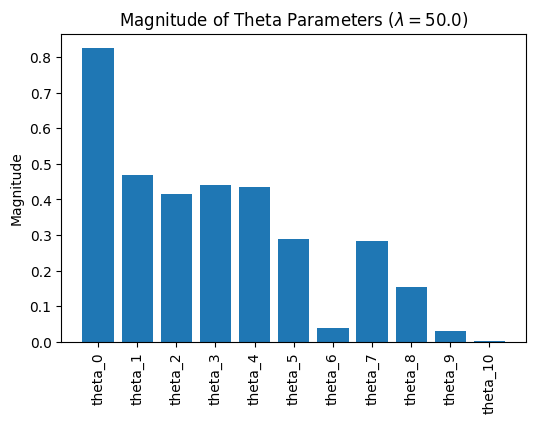

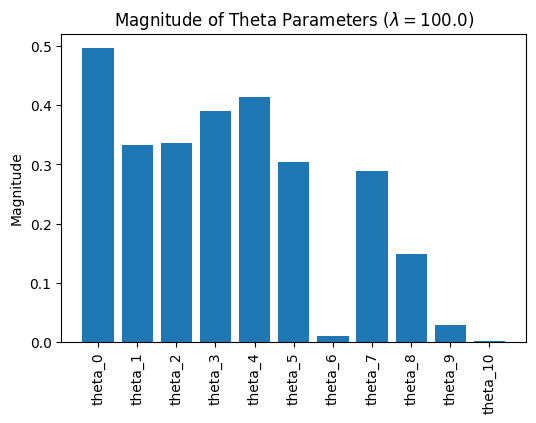

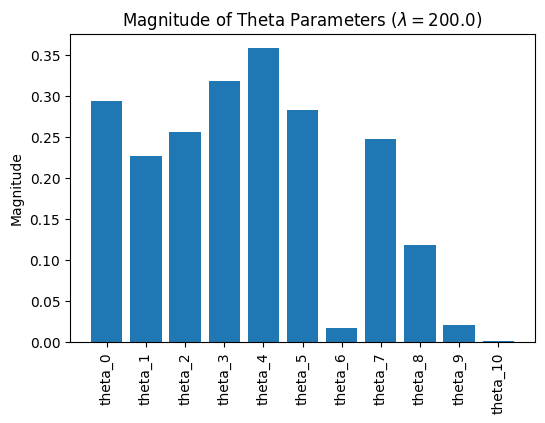

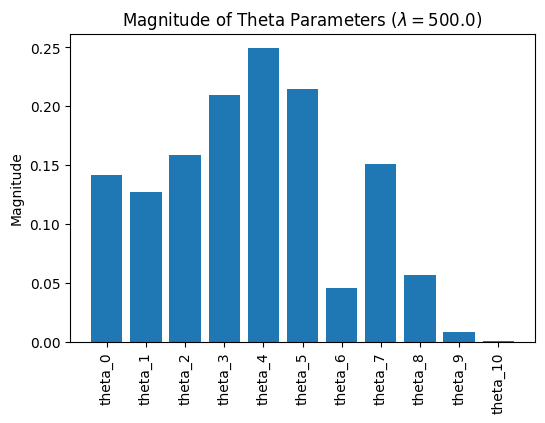

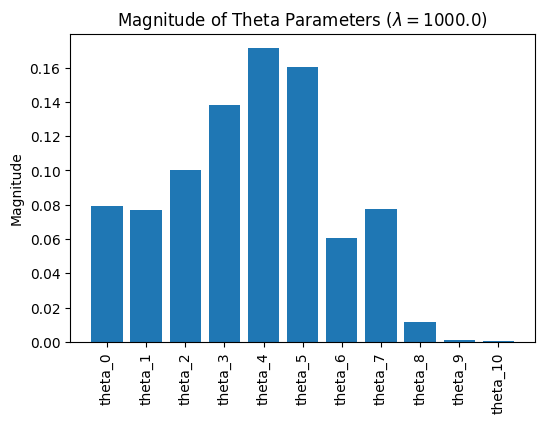

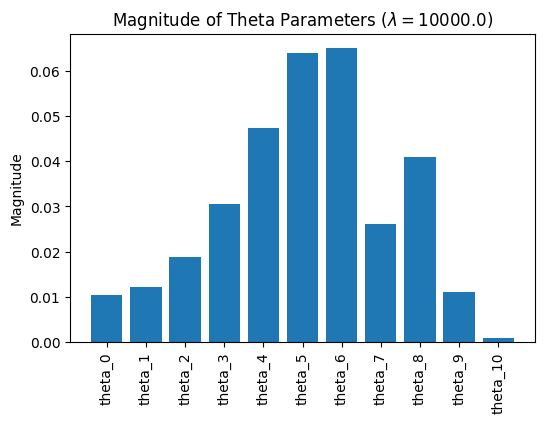

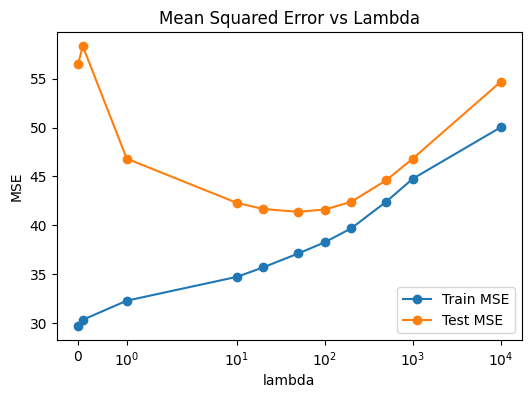

,Lambda,Train MSE,Test MSE
0,0.0,29.712408,56.444164
1,0.1,30.358548,58.312547
2,1.0,32.310228,46.817831
3,10.0,34.747509,42.295637
4,20.0,35.722057,41.672321
5,50.0,37.140198,41.387204
6,100.0,38.278340,41.619653
7,200.0,39.708039,42.414911
8,500.0,42.425341,44.615453
9,1000.0,44.766769,46.820212


In [8]:
# We first set our original data to "train" data 
X_train, y_train = X, y

# Next, we will generate some test data to see how well our model generalizes
x_test = rng.uniform(0, 5, size = n)

# Here, we add additional polynomial features to the test data as well
# using the function you wrote earlier
X_test = add_polynomial_features(x_test, 10)


# Next we're going to add noise, the same way we did for the training data
noise = rng.normal(0, 1, size=n)
uniform_noise = rng.uniform(-10, 10, size=n)

# Finally, we define the "test" distribution
y_test = 3 + (2 * (x_test ** 2)) + noise + uniform_noise

# Here is a list of lambda values to try 
lambdas = [0.0, 0.1, 1.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0, 10000.0]
train_mse, test_mse = [], []

# Here, we define the identity matrix
I = np.identity(X_train.shape[1])

# Iterate over each lambda value to see which lamda does best on test data
# This is generally called a "hyper parameter search"
for lam in lambdas:

    ###############################################
    ############### Question 5 ####################
    ###############################################

    # TODO: Compute theta using the equation for linear regression with L2 regularization (also called Ridge Regression) shown above
    # Remember, here, we use the train set to train the model, i.e., only the train set will be used to compute theta. 

    ################################################
    ########## Write your answer here ##############    
    ################################################

    theta = np.linalg.inv(X_train.T @ X_train + lam * I) @ X_train.T @ y_train

    
    # Now use your code from Question 3 to compute the predicted outputs for both the train and test sets
    # using the theta you have just found above
    y_pred = X_train @ theta
    y_test_pred = X_test @ theta

    ################################################
    ########## End of your answer ##################
    ################################################
    
    # Using the predictions above, we now compute the mean squared errors for both the train and test sets
    train_mse.append(np.mean((y_train - y_pred) ** 2))
    test_mse.append(np.mean((y_test - y_test_pred) ** 2))


    # As before, we plot the magnitudes of theta
    plt.figure(figsize = (6, 4))
    plt.bar(['theta_' + str(i) for i in range(len(theta))], np.abs(theta))
    plt.xticks(rotation = 90)
    plt.ylabel('Magnitude')
    plt.title(f'Magnitude of Theta Parameters ($\\lambda={lam}$)')
    plt.show()


fig, ax = plt.subplots(figsize=(6,4))
ax.plot(lambdas, train_mse, marker='o', label='Train MSE')
ax.plot(lambdas, test_mse, marker='o', label='Test MSE')
ax.set_xscale('symlog')
ax.set_xlabel('lambda')
ax.set_ylabel('MSE')
ax.set_title('Mean Squared Error vs Lambda')
ax.legend()
plt.show()

df = pd.DataFrame({'Lambda': lambdas, 'Train MSE': train_mse, 'Test MSE': test_mse})
display(df)


## Question 6 (2 points each - total 10 points)
What can you tell about regularization from all of the plots above? Specifically:

(a) What changes as $\lambda$ goes up in terms of learned parameters? 

(b) What changes as $\lambda$ goes up in terms of mean squared error? 

(c) Does the model overfit at certain values of $\lambda$? If so, which?

(d) Does the model underfit at certain values of $\lambda$? If so, which?

(e) From the table, is there an optimal value of $\lambda$ that hits a good trade off between underfitting and overfitting?

**Answer:**

(a) Magnitude of parameters decreases as lambda goes up 

(b) Train MSE keeps going up as lambda increases. Test MSE goes down at first but then goes up 

(c) At lambda = 0 to 1 train mse is low and test mse is higher 

(d) At lambda = 500 - 10000, both train and test mse are high

(e) At lambda = 10-50, both train and test mse's are low